# Gradient Boosting Machines (GBM)

## Description:
 Gradient Boosting Machines are powerful ensemble techniques known for their high effectiveness in classification and regression tasks. They build an ensemble of weak prediction models, typically decision trees, in a stage-wise fashion and optimize an arbitrary differentiable loss function.



In [46]:
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Example data
data = pd.read_csv('../input/preprocessed_data.csv') 
import helper

n_estimators: 1, RMSE: 1.6625491555755327
n_estimators: 2, RMSE: 1.598203480305203
n_estimators: 3, RMSE: 1.556755499404045
n_estimators: 4, RMSE: 1.5096008244132428
n_estimators: 5, RMSE: 1.479030770456412
n_estimators: 6, RMSE: 1.4332802900027524
n_estimators: 7, RMSE: 1.411541280332665
n_estimators: 8, RMSE: 1.3747727704268144
n_estimators: 9, RMSE: 1.3593762573151755
n_estimators: 10, RMSE: 1.3334331825961485
n_estimators: 11, RMSE: 1.319150382415926
n_estimators: 12, RMSE: 1.3090115632015524
n_estimators: 13, RMSE: 1.285719807794209
n_estimators: 14, RMSE: 1.2781284916765627
n_estimators: 15, RMSE: 1.2724014432600717
n_estimators: 16, RMSE: 1.265503136064232
n_estimators: 17, RMSE: 1.2639106593786005
n_estimators: 18, RMSE: 1.2623424332002313
n_estimators: 19, RMSE: 1.2636185262262616
n_estimators: 20, RMSE: 1.2600721523981648
n_estimators: 21, RMSE: 1.2586583534857794
n_estimators: 22, RMSE: 1.2626617666995115
n_estimators: 23, RMSE: 1.2635865146273846
n_estimators: 24, RMSE: 1.2

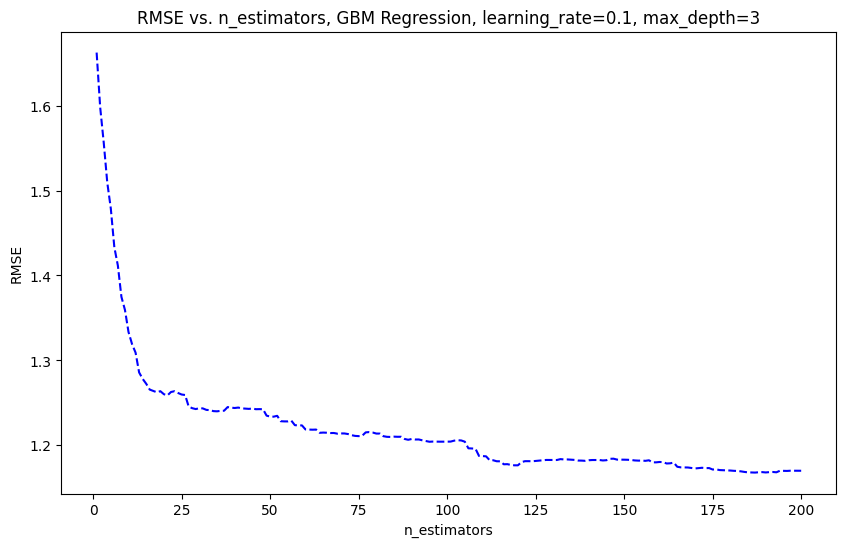

Best n_estimators: 187, RMSE: 1.1677296001062856


In [47]:

data = helper.remove_outliers_z_score(data)
X = data.drop('revenue', axis=1)
y = data['revenue']
y = y.apply(helper.revenue_log)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


n_estimators = np.linspace(1, 200, 200, dtype=int)
results = []
best_estimator = 0
best_rmse = 0

if (1):
    for n in n_estimators:
        model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        print(f'n_estimators: {n}, RMSE: {rmse}')
        results.append(rmse)
        if best_rmse == 0 or rmse < best_rmse:
            best_rmse = rmse
            best_estimator = n

    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators, results, color='blue', linestyle='dashed', markersize=10)
    plt.title('RMSE vs. n_estimators, GBM Regression, learning_rate=0.1, max_depth=3')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()
    print(f'Best n_estimators: {best_estimator}, RMSE: {best_rmse}')


MSE: 2.0533394921737256
Predicted: 18.77,	 True: 19.32178925901524	
Predicted: 11.96,	 True: 17.255271898702418	
Predicted: 17.00,	 True: 16.948489482764487	
Predicted: 17.57,	 True: 17.228413560739067	
Predicted: 17.43,	 True: 18.03936604781184	
Predicted: 18.39,	 True: 19.565470297250226	
Predicted: 17.83,	 True: 17.948400926153848	
Predicted: 18.34,	 True: 18.76282112198046	
Predicted: 17.34,	 True: 16.341734119780654	
Predicted: 18.25,	 True: 18.448825255293713	


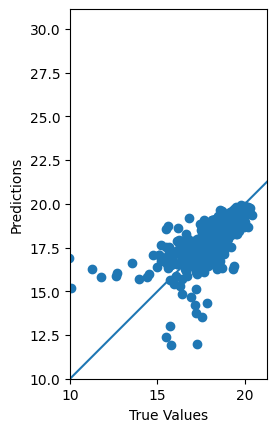

In [48]:
X = helper.data_standardizer(X,8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n = 54
model = GradientBoostingRegressor(n_estimators=n, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'MSE: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,plt.xlim()[1]])
plt.ylim([10,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


for i in range(10):
    format_float = "{:.2f}".format(predictions[i])
    print(f'Predicted: {format_float},\t True: {y_test.iloc[i]}\t')